In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
il_yield = pd.read_csv('IL_yield.csv') #contains corn yields for various census counties in Illinois

evi = pd.read_csv('EVI.csv') # contains Enhanced Vegetation Indices for pixels extract from The Terra Moderate Resolution Imaging Spectroradiometer (MODIS)

evi_stacked = pd.read_csv('EVI_stacked.csv') # data is stacked to include the EVI observations for each 16 days in the column.

era5 = pd.read_csv('ERA5.csv') #contains 2m temperature readings from ERA5 Renalaysis



In [3]:
era5

,lat,long,time,t2m,county
0,42.50,-90.5,1989-01-01T00:00:00,268.996185,JO DAVIESS
1,42.50,-90.5,1989-01-15T00:00:00,271.925720,JO DAVIESS
2,42.50,-90.5,1989-01-28T00:00:00,276.593048,JO DAVIESS
3,42.50,-90.5,1989-02-01T00:00:00,282.042358,JO DAVIESS
4,42.50,-90.5,1989-02-15T00:00:00,269.375763,JO DAVIESS
...,...,...,...,...,...
328675,37.25,-89.0,2012-11-15T00:00:00,278.565491,PULASKI
328676,37.25,-89.0,2012-11-28T00:00:00,274.160889,PULASKI
328677,37.25,-89.0,2012-12-01T00:00:00,285.636108,PULASKI
328678,37.25,-89.0,2012-12-15T00:00:00,282.508789,PULASKI


In [4]:
il_yield

,year,county,yield
0,2019,LOGAN,194.2
1,2019,MACON,204.4
2,2019,MARSHALL,184.9
3,2019,MASON,169.0
4,2019,MCLEAN,198.8
...,...,...,...
9617,1925,MONTGOMERY,39.0
9618,1925,MORGAN,47.0
9619,1925,PIKE,43.0
9620,1925,SANGAMON,41.0


In [5]:
evi_stacked

,year,county,long,lat,evi_1,evi_17,evi_33,evi_49,evi_65,evi_81,...,evi_209,evi_225,evi_241,evi_257,evi_273,evi_289,evi_305,evi_321,evi_337,evi_353
0,2001,ADAMS,-91.525,40.075,-0.146923,0.156453,-0.072903,-0.063690,-0.078860,-0.292650,...,-0.287875,0.127960,0.630331,0.057551,0.028800,0.224734,-0.037140,-0.054813,0.095283,0.132038
1,2001,ADAMS,-91.525,40.125,-0.156214,-0.188116,-0.091597,-0.109840,-0.099103,0.021988,...,0.226016,0.078727,-0.084846,0.029688,0.003740,-0.170605,-0.061510,-0.064935,-0.092197,-0.100994
2,2001,ADAMS,-91.525,40.175,0.000551,0.082851,0.108108,0.104726,0.101105,0.126727,...,0.455470,0.454312,0.411025,0.357470,0.320813,0.237779,0.165385,0.161586,0.142840,0.017134
3,2001,ADAMS,-91.525,40.225,-0.005583,0.084916,0.116382,0.115102,0.107363,0.130750,...,0.436069,0.462088,0.436204,0.374752,0.330077,0.250325,0.180660,0.169659,0.148152,0.017000
4,2001,ADAMS,-91.475,39.975,-0.030379,0.079086,0.107433,0.092655,0.078413,0.107965,...,0.544530,0.531395,0.461023,0.335277,0.239753,0.155304,0.102718,0.097096,0.079518,0.084052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95413,2019,WOODFORD,-88.975,40.875,0.104419,-0.036563,0.101393,0.092699,0.106869,0.122912,...,0.625691,0.686203,0.650799,0.520993,0.358112,0.226376,0.176463,0.161508,0.130636,0.117372
95414,2019,WOODFORD,-88.975,40.925,0.107272,-0.041136,0.090257,0.119536,0.109404,0.117849,...,0.612463,0.673483,0.637218,0.508683,0.357745,0.241118,0.164970,0.130541,0.129778,0.109219
95415,2019,WOODFORD,-88.925,40.825,0.107422,-0.039893,0.103312,0.089351,0.106749,0.120598,...,0.630736,0.684656,0.647539,0.525632,0.362510,0.218094,0.176306,0.171923,0.131405,0.113442
95416,2019,WOODFORD,-88.925,40.875,0.106712,-0.039885,0.101711,0.090369,0.109686,0.125570,...,0.606228,0.654604,0.608509,0.479529,0.334070,0.232092,0.193145,0.171825,0.129873,0.116098


In [6]:
evi 

,county,long,lat,year,evi,day
0,ADAMS,-91.525,40.125,2003,-2269.190909,49
1,ADAMS,-91.525,40.075,2003,106.627273,49
2,ADAMS,-91.475,40.075,2003,-1564.628099,49
3,ADAMS,-91.475,40.025,2003,234.900000,49
4,ADAMS,-91.425,40.075,2003,-2951.487603,49
...,...,...,...,...,...,...
2391195,LAWRENCE,-87.525,38.775,2007,3929.177778,161
2391196,LAWRENCE,-87.525,38.725,2007,4483.133333,161
2391197,LAWRENCE,-87.525,38.675,2007,3688.591111,161
2391198,LAWRENCE,-87.475,38.775,2007,4946.982222,161


In [7]:
il_yield = il_yield[(il_yield['year']) >2000] #only interested in data from 2001 onwards as evi_stacked doesn't have pre 2001 data

In [8]:
df = pd.merge(evi_stacked , il_yield , on=['year', 'county'], how='inner')#concatennating evi_stacked and il_yield
df.describe()

,year,long,lat,evi_1,evi_17,evi_33,evi_49,evi_65,evi_81,evi_97,...,evi_225,evi_241,evi_257,evi_273,evi_289,evi_305,evi_321,evi_337,evi_353,yield
count,95418.000000,95418.000000,95418.000000,95418.000000,95418.000000,95418.000000,95418.000000,95418.000000,95418.000000,95418.000000,...,95418.000000,95418.000000,95418.000000,95418.000000,95418.000000,95418.000000,95418.000000,95418.000000,95418.000000,95418.000000
mean,2009.028852,-89.224441,40.182692,0.111379,0.103829,0.103493,0.122539,0.147131,0.174276,0.208466,...,0.588765,0.476685,0.344081,0.259462,0.216839,0.184040,0.162597,0.144022,0.136318,164.687665
std,5.540395,0.977407,1.254825,0.074800,0.077502,0.077552,0.067753,0.053175,0.060850,0.069170,...,0.121259,0.118654,0.107401,0.079673,0.063978,0.056290,0.057018,0.068368,0.127549,29.862710
min,2001.000000,-91.525000,36.975000,-0.298529,-0.664722,-0.730432,-0.407333,-0.313763,-0.298419,-0.381331,...,-0.307444,-0.363378,-0.297571,-0.374083,-0.298006,-0.372275,-0.470191,-0.305899,-2.540578,21.100000
25%,2004.000000,-89.975000,39.275000,0.068076,0.041032,0.043415,0.099346,0.126173,0.141879,0.164758,...,0.532892,0.410107,0.270928,0.204731,0.175580,0.151108,0.133712,0.118644,0.109422,146.500000
50%,2008.000000,-89.175000,40.225000,0.128596,0.121203,0.124383,0.134942,0.146730,0.167912,0.200045,...,0.607374,0.480088,0.341753,0.256158,0.214633,0.183174,0.163744,0.148887,0.141930,168.000000
75%,2015.000000,-88.425000,41.125000,0.160857,0.158670,0.156917,0.163092,0.171944,0.204329,0.248494,...,0.671538,0.557259,0.414491,0.311114,0.257519,0.218085,0.196424,0.182519,0.177813,185.000000
max,2019.000000,-87.475000,42.525000,0.422963,0.447087,0.448197,0.385832,0.382271,0.516470,0.591080,...,0.864040,0.798383,0.695266,0.555697,0.444839,0.395964,0.400765,0.786688,2.472423,246.700000


In [9]:
#dropping the evi readings from outside April-September
df=df.drop(['evi_1', 'evi_17', 'evi_33', 'evi_49', 'evi_65', 'evi_289', 'evi_305','evi_81', 'evi_321', 'evi_337','evi_353' ], axis=1)
df

,year,county,long,lat,evi_97,evi_113,evi_129,evi_145,evi_161,evi_177,evi_193,evi_209,evi_225,evi_241,evi_257,evi_273,yield
0,2001,ADAMS,-91.525,40.075,-0.027958,0.002118,0.078466,0.239539,0.097495,0.090312,-0.286143,-0.287875,0.127960,0.630331,0.057551,0.028800,152.0
1,2001,ADAMS,-91.525,40.125,-0.062362,-0.032532,0.018832,-0.031793,0.041932,0.027115,0.207051,0.226016,0.078727,-0.084846,0.029688,0.003740,152.0
2,2001,ADAMS,-91.525,40.175,0.176437,0.215933,0.354114,0.130009,0.407055,0.389221,0.442552,0.455470,0.454312,0.411025,0.357470,0.320813,152.0
3,2001,ADAMS,-91.525,40.225,0.201068,0.238947,0.385306,0.140931,0.441663,0.451710,0.487719,0.436069,0.462088,0.436204,0.374752,0.330077,152.0
4,2001,ADAMS,-91.475,39.975,0.137886,0.144569,0.200328,0.208104,0.275289,0.336119,0.451185,0.544530,0.531395,0.461023,0.335277,0.239753,152.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95413,2019,WOODFORD,-88.975,40.875,0.140442,0.165847,0.154039,0.155317,0.169823,0.374882,0.585188,0.625691,0.686203,0.650799,0.520993,0.358112,183.6
95414,2019,WOODFORD,-88.975,40.925,0.144516,0.168258,0.153483,0.160423,0.180201,0.380882,0.580657,0.612463,0.673483,0.637218,0.508683,0.357745,183.6
95415,2019,WOODFORD,-88.925,40.825,0.137358,0.165607,0.139696,0.158704,0.167959,0.346352,0.554003,0.630736,0.684656,0.647539,0.525632,0.362510,183.6
95416,2019,WOODFORD,-88.925,40.875,0.142063,0.166649,0.141639,0.169706,0.196470,0.379590,0.566685,0.606228,0.654604,0.608509,0.479529,0.334070,183.6


In [10]:
# rounding lat and long reading in df to then later be able to concat on long lat in era5 file
def x_round(x):
    return round(x*4)/4
df['lat'] = df['lat'].apply(x_round)
df['long'] = df['long'].apply(x_round)

In [11]:
df

,year,county,long,lat,evi_97,evi_113,evi_129,evi_145,evi_161,evi_177,evi_193,evi_209,evi_225,evi_241,evi_257,evi_273,yield
0,2001,ADAMS,-91.5,40.00,-0.027958,0.002118,0.078466,0.239539,0.097495,0.090312,-0.286143,-0.287875,0.127960,0.630331,0.057551,0.028800,152.0
1,2001,ADAMS,-91.5,40.00,-0.062362,-0.032532,0.018832,-0.031793,0.041932,0.027115,0.207051,0.226016,0.078727,-0.084846,0.029688,0.003740,152.0
2,2001,ADAMS,-91.5,40.25,0.176437,0.215933,0.354114,0.130009,0.407055,0.389221,0.442552,0.455470,0.454312,0.411025,0.357470,0.320813,152.0
3,2001,ADAMS,-91.5,40.25,0.201068,0.238947,0.385306,0.140931,0.441663,0.451710,0.487719,0.436069,0.462088,0.436204,0.374752,0.330077,152.0
4,2001,ADAMS,-91.5,40.00,0.137886,0.144569,0.200328,0.208104,0.275289,0.336119,0.451185,0.544530,0.531395,0.461023,0.335277,0.239753,152.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95413,2019,WOODFORD,-89.0,41.00,0.140442,0.165847,0.154039,0.155317,0.169823,0.374882,0.585188,0.625691,0.686203,0.650799,0.520993,0.358112,183.6
95414,2019,WOODFORD,-89.0,41.00,0.144516,0.168258,0.153483,0.160423,0.180201,0.380882,0.580657,0.612463,0.673483,0.637218,0.508683,0.357745,183.6
95415,2019,WOODFORD,-89.0,40.75,0.137358,0.165607,0.139696,0.158704,0.167959,0.346352,0.554003,0.630736,0.684656,0.647539,0.525632,0.362510,183.6
95416,2019,WOODFORD,-89.0,41.00,0.142063,0.166649,0.141639,0.169706,0.196470,0.379590,0.566685,0.606228,0.654604,0.608509,0.479529,0.334070,183.6


In [12]:
era5['time']=pd.to_datetime(era5['time']) # convert to time series

In [13]:
era5['year']=pd.DatetimeIndex(era5['time']).year #introducing year column

In [14]:
era5['day_of_year']=[x.timetuple().tm_yday for x in era5['time']] #introducing day_of_year column so 1st Jan = 1, 5th feb = 36

In [15]:
era5 = era5.drop('time', axis=1) # dropping time column as not needed 

In [16]:
era5.head()

,lat,long,t2m,county,year,day_of_year
0,42.5,-90.5,268.996185,JO DAVIESS,1989,1
1,42.5,-90.5,271.925720,JO DAVIESS,1989,15
2,42.5,-90.5,276.593048,JO DAVIESS,1989,28
3,42.5,-90.5,282.042358,JO DAVIESS,1989,32
4,42.5,-90.5,269.375763,JO DAVIESS,1989,46


In [17]:
era5 = era5[era5['year']>2000]

In [18]:
era5.describe()

,lat,long,t2m,year,day_of_year
count,148896.000000,148896.000000,148896.000000,148896.000000,148896.000000
mean,40.034816,-89.279497,287.348548,2009.773936,181.341755
std,1.332644,0.932120,11.552449,5.438029,105.640587
min,37.250000,-91.250000,249.336243,2001.000000,1.000000
25%,39.000000,-90.000000,278.305054,2005.000000,90.250000
50%,40.000000,-89.250000,288.339935,2010.000000,181.000000
75%,41.000000,-88.500000,297.752029,2014.000000,272.500000
max,42.500000,-87.750000,312.512543,2019.000000,363.000000


In [19]:
era5 = era5[era5['day_of_year']>90]
era5 = era5[era5['day_of_year']<(365-90)]# got rid of temperature data outside April-September

In [20]:
era5['day_of_year'].unique() # this is wrong 92 should equal 91 and so on, should be 19 unique values
# problem caused by leap years in day_of_year

array([ 91, 105, 118, 121, 135, 148, 152, 166, 179, 182, 196, 209, 213,
       227, 240, 244, 258, 271, 274,  92, 106, 119, 122, 136, 149, 153,
       167, 180, 183, 197, 210, 214, 228, 241, 245, 259, 272], dtype=int64)

In [21]:
#sorting out error due to leap years
list1 =[91, 105, 118, 121, 135, 148, 152, 166, 179, 182, 196, 209, 213,
       227, 240, 244, 258, 271, 274]
list2 = [92, 106,119, 122, 136, 149, 153, 167, 180, 183, 197, 210, 214, 228, 241,
         245, 259, 272, 275]
era5.replace(to_replace = list2, value = list1, inplace = True) # this 

In [22]:
era5['day_of_year'].unique() #sorted leap year error

array([ 91, 105, 118, 121, 135, 148, 152, 166, 179, 182, 196, 209, 213,
       227, 240, 244, 258, 271, 274], dtype=int64)

In [23]:
#concatenating eras5 temperature day of year data with existing data frame
for i in [91, 105, 118, 121, 135, 148, 152, 166, 179, 182, 196, 209, 213,
       227, 240, 244, 258, 271, 274]:
    d1 = era5[era5['day_of_year']==i]
    d1 = d1.drop(['county', 'day_of_year'], axis=1)
    d1.rename(columns={"t2m":"temp_{}".format(i)}, inplace=True)
    df = pd.merge(df , d1 , on=['year', 'lat', 'long'], how='inner')
    

In [24]:
df

,year,county,long,lat,evi_97,evi_113,evi_129,evi_145,evi_161,evi_177,...,temp_182,temp_196,temp_209,temp_213,temp_227,temp_240,temp_244,temp_258,temp_271,temp_274
0,2001,ADAMS,-91.25,39.75,0.188241,0.209123,0.318382,0.383626,0.515495,0.638540,...,303.474426,297.933472,297.752686,305.610138,297.604034,302.095612,297.232819,290.725220,292.234222,295.134064
1,2001,ADAMS,-91.25,39.75,0.245399,0.300794,0.384937,0.415560,0.507063,0.625893,...,303.474426,297.933472,297.752686,305.610138,297.604034,302.095612,297.232819,290.725220,292.234222,295.134064
2,2001,ADAMS,-91.25,39.75,0.211883,0.255587,0.360193,0.404474,0.530928,0.690273,...,303.474426,297.933472,297.752686,305.610138,297.604034,302.095612,297.232819,290.725220,292.234222,295.134064
3,2001,ADAMS,-91.25,39.75,0.220353,0.249096,0.324247,0.358083,0.482646,0.682820,...,303.474426,297.933472,297.752686,305.610138,297.604034,302.095612,297.232819,290.725220,292.234222,295.134064
4,2001,ADAMS,-91.25,39.75,0.241189,0.302171,0.396532,0.415911,0.505952,0.672718,...,303.474426,297.933472,297.752686,305.610138,297.604034,302.095612,297.232819,290.725220,292.234222,295.134064
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70769,2019,WILLIAMSON,-88.75,37.75,0.377244,0.463262,0.506099,0.455713,0.357589,0.455678,...,305.592438,301.696289,302.247284,301.468628,304.107025,300.606140,301.408508,298.722748,302.566040,302.689911
70770,2019,WILLIAMSON,-88.75,37.75,0.380952,0.463400,0.516611,0.504581,0.412360,0.484024,...,305.592438,301.696289,302.247284,301.468628,304.107025,300.606140,301.408508,298.722748,302.566040,302.689911
70771,2019,WILLIAMSON,-88.75,37.75,0.400813,0.497171,0.572506,0.544802,0.372926,0.515896,...,305.592438,301.696289,302.247284,301.468628,304.107025,300.606140,301.408508,298.722748,302.566040,302.689911
70772,2019,WILLIAMSON,-88.75,37.75,0.372275,0.470792,0.540066,0.502445,0.347186,0.473863,...,305.592438,301.696289,302.247284,301.468628,304.107025,300.606140,301.408508,298.722748,302.566040,302.689911


Below is the final data frame we train our models on

In [25]:
df = df.drop(['year', 'county'], axis=1) #irrelavant data to model training
df

,long,lat,evi_97,evi_113,evi_129,evi_145,evi_161,evi_177,evi_193,evi_209,...,temp_182,temp_196,temp_209,temp_213,temp_227,temp_240,temp_244,temp_258,temp_271,temp_274
0,-91.25,39.75,0.188241,0.209123,0.318382,0.383626,0.515495,0.638540,0.645287,0.585739,...,303.474426,297.933472,297.752686,305.610138,297.604034,302.095612,297.232819,290.725220,292.234222,295.134064
1,-91.25,39.75,0.245399,0.300794,0.384937,0.415560,0.507063,0.625893,0.678111,0.661959,...,303.474426,297.933472,297.752686,305.610138,297.604034,302.095612,297.232819,290.725220,292.234222,295.134064
2,-91.25,39.75,0.211883,0.255587,0.360193,0.404474,0.530928,0.690273,0.718966,0.652110,...,303.474426,297.933472,297.752686,305.610138,297.604034,302.095612,297.232819,290.725220,292.234222,295.134064
3,-91.25,39.75,0.220353,0.249096,0.324247,0.358083,0.482646,0.682820,0.748990,0.705861,...,303.474426,297.933472,297.752686,305.610138,297.604034,302.095612,297.232819,290.725220,292.234222,295.134064
4,-91.25,39.75,0.241189,0.302171,0.396532,0.415911,0.505952,0.672718,0.720128,0.674931,...,303.474426,297.933472,297.752686,305.610138,297.604034,302.095612,297.232819,290.725220,292.234222,295.134064
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70769,-88.75,37.75,0.377244,0.463262,0.506099,0.455713,0.357589,0.455678,0.508153,0.553225,...,305.592438,301.696289,302.247284,301.468628,304.107025,300.606140,301.408508,298.722748,302.566040,302.689911
70770,-88.75,37.75,0.380952,0.463400,0.516611,0.504581,0.412360,0.484024,0.488790,0.497901,...,305.592438,301.696289,302.247284,301.468628,304.107025,300.606140,301.408508,298.722748,302.566040,302.689911
70771,-88.75,37.75,0.400813,0.497171,0.572506,0.544802,0.372926,0.515896,0.523754,0.531588,...,305.592438,301.696289,302.247284,301.468628,304.107025,300.606140,301.408508,298.722748,302.566040,302.689911
70772,-88.75,37.75,0.372275,0.470792,0.540066,0.502445,0.347186,0.473863,0.521738,0.555420,...,305.592438,301.696289,302.247284,301.468628,304.107025,300.606140,301.408508,298.722748,302.566040,302.689911


Turning data into a test train set.

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [27]:
X=df.drop('yield', axis=1) # dropping yield column as we need to predict yield
y=df['yield']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101) 

In [29]:
scaler= MinMaxScaler()

In [30]:
X_train = scaler.fit_transform(X_train) # normalising 

In [31]:
X_test = scaler.transform(X_test)

In [32]:
from tensorflow.keras.models import Sequential

In [33]:
from tensorflow.keras.layers import Dense

Model 1: neural network

In [34]:
model = Sequential()

In [35]:
X_train.shape

(49541, 33)

In [36]:
X_test.shape

(21233, 33)

In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [38]:
#model has 3 inner nodes. using activation relu. optimizer adam and loss is in mse
model = Sequential()

model.add(Dense(33,activation='relu'))
model.add(Dense(33,activation='relu'))
model.add(Dense(33,activation='relu'))
model.add(Dense(33,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [39]:
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=128,epochs=400)

Train on 49541 samples, validate on 21233 samples
Epoch 1/400
49541/49541 [==============================] - 2s 47us/sample - loss: 4731.0136 - val_loss: 573.4869
Epoch 2/400
49541/49541 [==============================] - 1s 29us/sample - loss: 428.2135 - val_loss: 367.0239
Epoch 3/400
49541/49541 [==============================] - 1s 29us/sample - loss: 342.9038 - val_loss: 315.7315
Epoch 4/400
49541/49541 [==============================] - 1s 29us/sample - loss: 292.8898 - val_loss: 284.6744
Epoch 5/400
49541/49541 [==============================] - 1s 28us/sample - loss: 250.7938 - val_loss: 232.0043
Epoch 6/400
49541/49541 [==============================] - 1s 29us/sample - loss: 223.8391 - val_loss: 233.4043
Epoch 7/400
49541/49541 [==============================] - 1s 29us/sample - loss: 211.4227 - val_loss: 221.8099
Epoch 8/400
49541/49541 [==============================] - 1s 29us/sample - loss: 205.6097 - val_loss: 200.4654
Epoch 9/400
49541/49541 [============================

In [40]:
losses = pd.DataFrame(model.history.history)
losses.describe()

,loss,val_loss
count,400.000000,400.000000
mean,126.160698,125.078739
std,233.869399,45.533451
min,82.389704,82.282337
25%,89.182350,94.765776
50%,102.692811,110.872237
75%,123.831636,145.646584
max,4731.013551,573.486900


<Figure size 1440x360 with 0 Axes>

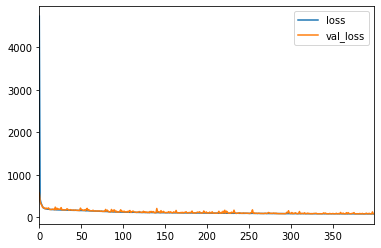

In [41]:
plt.figure(figsize=(20, 5))
losses.plot() #this plots the loss in the training set vs the loss in the validation set. Best if both minimized

Model 1 Evaluation

In [42]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [43]:
X_test

array([[0.21428571, 0.71428571, 0.58588762, ..., 0.42083013, 0.65021606,
        0.58901751],
       [0.71428571, 0.28571429, 0.73958756, ..., 0.39112652, 0.42449172,
        0.5248748 ],
       [0.5       , 0.33333333, 0.65897121, ..., 0.52383825, 0.20780656,
        0.02310101],
       ...,
       [0.85714286, 0.38095238, 0.63565754, ..., 0.8527525 , 0.51226609,
        0.74900534],
       [0.14285714, 0.42857143, 0.34269747, ..., 0.34566783, 0.40373322,
        0.58896933],
       [0.07142857, 0.57142857, 0.66228612, ..., 0.55169368, 0.3296758 ,
        0.56773592]])

In [44]:
predictions = model.predict(X_test)

In [45]:
mean_absolute_error(y_test,predictions)

6.972955710364763

In [46]:
np.sqrt(mean_squared_error(y_test,predictions))

9.113902174884931

In [47]:
explained_variance_score(y_test,predictions)

0.8962296519030578

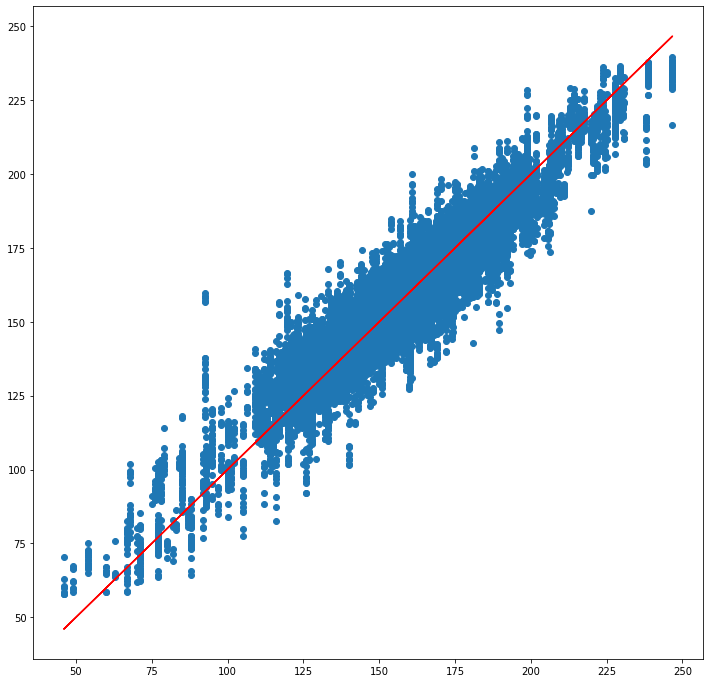

In [50]:
# Our predictions
plt.figure(figsize=(12, 12))
plt.scatter(y_test,predictions)

# Perfect predictions
plt.plot(y_test,y_test,'r')

In [51]:
errors = y_test.values.reshape(21233, 1) - predictions

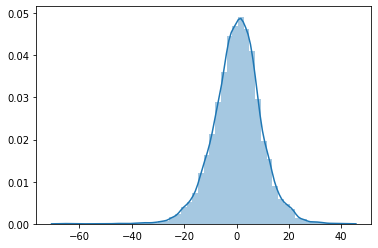

In [52]:
sns.distplot(errors)

In [53]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout

Changing model 1 with dropouts, callbacks and dropping nodes by half every layer but the results arent as good as the original.

In [54]:
model = Sequential()
model.add(Dense(33, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(17, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(9, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [55]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [56]:
model.fit(X_train, y=y_train.values, epochs=600, validation_data=(X_test, y_test.values), callbacks=[early_stop])

Train on 49541 samples, validate on 21233 samples
Epoch 1/600
49541/49541 [==============================] - 9s 176us/sample - loss: 8635.2091 - val_loss: 2311.3107
Epoch 2/600
49541/49541 [==============================] - 5s 103us/sample - loss: 6068.7186 - val_loss: 1121.1353
Epoch 3/600
49541/49541 [==============================] - 5s 93us/sample - loss: 5537.3182 - val_loss: 1323.1679
Epoch 4/600
49541/49541 [==============================] - 5s 109us/sample - loss: 4886.2293 - val_loss: 889.4600
Epoch 5/600
49541/49541 [==============================] - 5s 111us/sample - loss: 4331.2314 - val_loss: 819.1153
Epoch 6/600
49541/49541 [==============================] - 9s 179us/sample - loss: 4182.3341 - val_loss: 826.3736
Epoch 7/600
49541/49541 [==============================] - 9s 178us/sample - loss: 4039.1238 - val_loss: 1121.6355
Epoch 8/600
49541/49541 [==============================] - 9s 185us/sample - loss: 3817.1779 - val_loss: 818.3306
Epoch 9/600
49541/49541 [==========

Model 3 RandomForestRegressor 

In [58]:
from sklearn.ensemble import RandomForestRegressor

In [59]:
rfc = RandomForestRegressor(n_estimators=33)

In [60]:
rfc.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=33,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [61]:
predictions = rfc.predict(X_test)

Model 3 evaluation

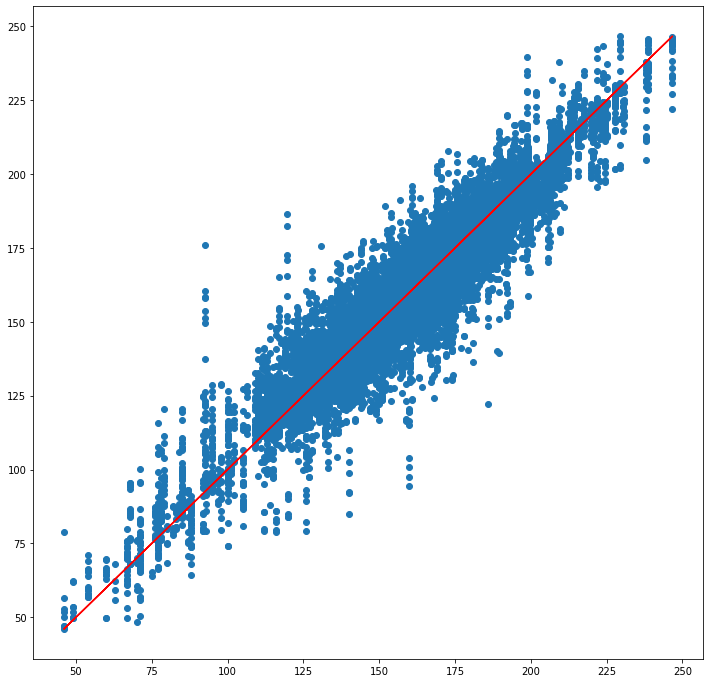

In [63]:
# Our predictions
plt.figure(figsize=(12, 12))
plt.scatter(y_test,predictions)

# Perfect predictions
plt.plot(y_test,y_test,'r')

In [64]:
errors = y_test - predictions

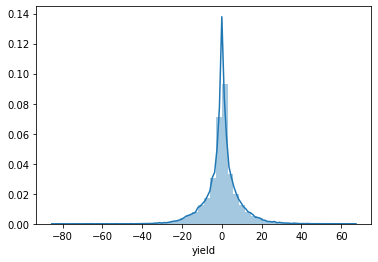

In [65]:
sns.distplot(errors)

In [66]:
mean_absolute_error(y_test,predictions)

5.4747673485275765

In [67]:
np.sqrt(mean_squared_error(y_test,predictions))

8.502647965628512

In [68]:
explained_variance_score(y_test,predictions)

0.9096150785180224

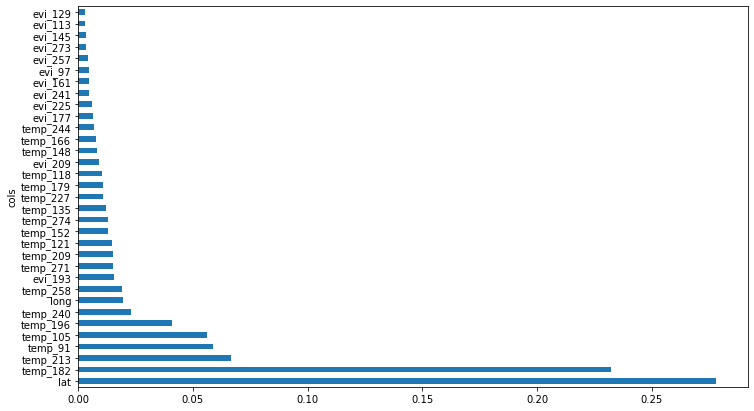

In [69]:
def rf_feat_importance(m, df):
    return pd.DataFrame({'cols':df.columns, 'imp':m.feature_importances_}
                       ).sort_values('imp', ascending=False)

df_x = df.drop(['yield'], axis=1)

fi = rf_feat_importance(rfc, df_x)

def plot_fi(fi):
    return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)

plot_fi(fi);

Model 2: DecisionTreeRegressor

In [70]:
from sklearn.tree import DecisionTreeRegressor

In [71]:
dtree=DecisionTreeRegressor()

In [72]:
dtree.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [73]:
predictions = dtree.predict(X_test)

Model 2 evaluation

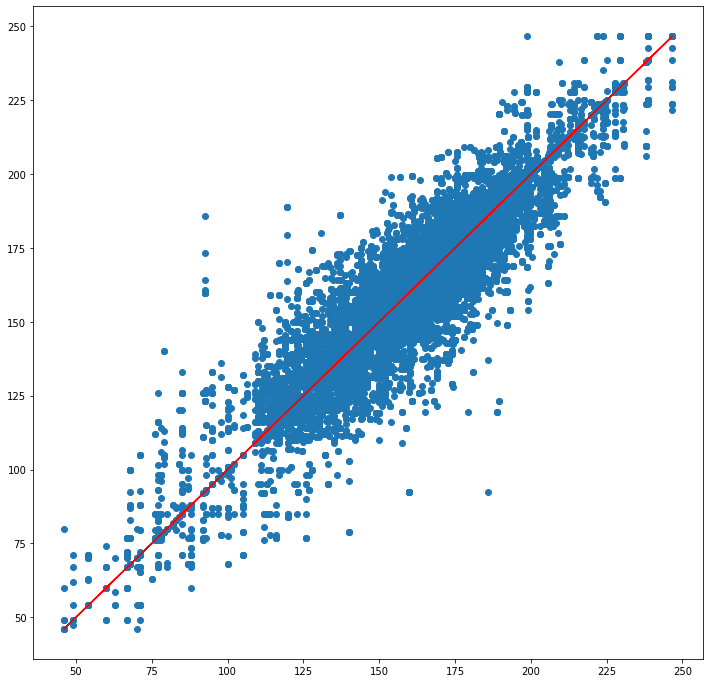

In [74]:
# Our predictions
plt.figure(figsize=(12, 12))
plt.scatter(y_test,predictions)

# Perfect predictions
plt.plot(y_test,y_test,'r')

In [75]:
errors = y_test - predictions

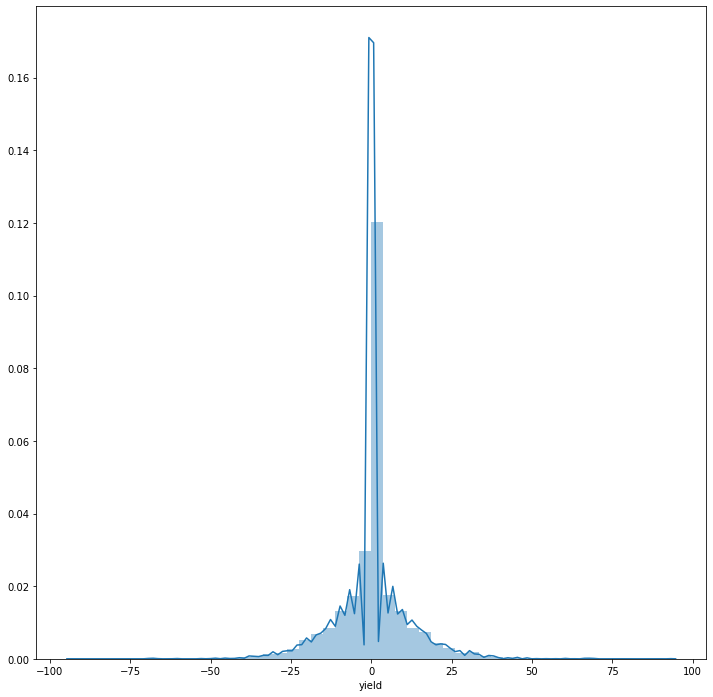

In [76]:
plt.figure(figsize=(12, 12))
sns.distplot(errors)

In [77]:
mean_absolute_error(y_test,predictions)

6.084630841928448

In [78]:
np.sqrt(mean_squared_error(y_test,predictions))

10.548958376232582

In [79]:
explained_variance_score(y_test,predictions)

0.8608735320407249